## Gather

In [1]:
#import libraries
import numpy as np
import pandas as pd
import requests
import urllib.request
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from datetime import datetime

In [2]:
# twitter_archive DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# using urllib.request.urlretrieve function
# to store downloaded file from url and name it image-predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
urllib.request.urlretrieve(url, 'image-predictions.tsv')

# image_predictions DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715:

Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989:

Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264:

In [5]:
# open tweet-json.txt file and read it line by line
with open('tweet-json.txt') as json_file:
    status = []
    for line in json_file:
        # store retrieved lines in a list
        status.append(json.loads(line))

#create a dataframe to store the retrieved data
tweet_json = pd.DataFrame(status)
#drop all columns except the three mentioned
tweet_json.drop(columns=tweet_json.columns.difference(['id','favorite_count','retweet_count']), axis=1, inplace=True)

## Assess

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# check for tweets duplicates
twitter_archive[twitter_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
twitter_archive[twitter_archive['name'].str.len() < 4]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
53,881906580714921986,NaN,NaN,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
77,877736472329191424,NaN,NaN,2017-06-22 03:54:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,None,None,None,None
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None


In [11]:
# checking for outliers
twitter_archive[twitter_archive['rating_numerator'] > 13].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,None,None,None
434,820494788566847489,NaN,NaN,2017-01-15 04:56:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We are proud to support @LoveYo...,8.203146e+17,4.196984e+09,2017-01-14 17:00:24 +0000,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
1609,685547936038666240,NaN,NaN,2016-01-08 19:45:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685547936...,14,10,None,None,None,pupper,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
436,820314633777061888,NaN,NaN,2017-01-14 17:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We are proud to support @LoveYourMelon on thei...,NaN,NaN,NaN,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None
426,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [12]:
twitter_archive[twitter_archive['rating_denominator'] > 10].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [13]:
# checking how many sources are there
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [15]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
# checking for tweet duplicates
image_predictions[image_predictions['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
tweet_json

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
tweet_json.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [22]:
# checking for id duplicates
tweet_json[tweet_json['id'].duplicated()]

,favorite_count,id,retweet_count


#### Quality
##### `twitter_archive` table
- tweet_id is integer, instead of string.
- source web pages should just be the name of the source.
- missing records from dog_stages and name, not identified because it's assigned None instead of NaN.
- incorrect dog names.
- unnecessary numerators and denomirators columns, rating column can be extracted from text column.
- in_reply_to_status_id, in_reply_to_user_id retweeted_status_id, retweeted_status_user_id are floats.
- timestamp and retweeted_status_timestamp are objects instead of datetime.
- expanded urls is the twitter page follwed by the tweet id, so column should be dropped.
- retweets and replies aren't essential.

##### `image_predictions` table
- tweet_id is integer, instead of string.
- some names have a capital first letter in p1, p2, and p3.
- domain name, in jpg_url is the same for all observations, so just the name is needed in our dataset.

##### `tweet_json` table
- tweet_id is integer, instead of string.
- match id name with other tables.

#### Tidiness
- one variable in four columns (dogoo, floofer, pupper, and puppo), should be one column, stage.
- one table split into three (join twitter_archive, image_predictions and tweet_json)

## Clean

In [23]:
# make a copy of original dataset

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Quality

#### tweet_id wrong datatype, `tweet_json`: wrong column name

##### Define

Convert tweet id to string, and in tweet_json change column name from id to tweet_id.

##### Code

In [24]:
# rename id column to tweet_id to match the other tables
tweet_json_clean.rename(columns={"id": "tweet_id"}, inplace=True)

# convert tweet ids in all tables to a string so any preceding zeros aren't removed
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)


##### Test

In [25]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

In [26]:
image_predictions_clean.tweet_id.dtype

dtype('O')

In [27]:
tweet_json_clean.tweet_id.dtype

dtype('O')

#### `twitter_archive`: source contains HTML tag

##### Define

Truncate source web page and HTML tags.

##### Code

In [28]:
# use str.extract with regex to match patterns and get the name of the source only
twitter_archive_clean.source = twitter_archive_clean.source.str.extract(r'>([a-zA-Z\s-]+)', expand = True)

##### Test

In [29]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### `twitter_archive`: unidentified missing records, in name and dog columns

##### Define

replace None values for each of (name, dogoo, floofer, pupper, and puppo) with NaN.

##### Code

In [30]:
columns = ['name', 'doggo', 'floofer', 'pupper', 'puppo']

# replace None with np.nan across these columns
twitter_archive_clean[columns] = twitter_archive_clean[columns].replace({'None': np.nan})

##### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(2), object(1

#### `twitter_archive`: incorrect dog names

##### Define

Use pandas replace with regex to replace lower case names with np.nan

##### Code

In [32]:
# remove names that starts with lowercase letters
twitter_archive_clean.name.replace(value=np.nan, to_replace = r'(^[a-z]+[A-Z]*)', regex=True, inplace=True)

##### Test

In [33]:
# check how many names start with a lowercase letters
sum(twitter_archive_clean['name'].str.contains(pat='^[a-z]', regex=True, na=False))

0

#### `twitter_archive`: unnecessary numerators and denomirators columns, rating can be extracted from text column.

##### Define

Drop rating_numerator and rating_denominator, and create a new rating column, then use str.extract on text column to get rating.

##### Code

In [34]:
# drop numerator and denominator columns
twitter_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

# str.extract to get rating from text column
twitter_archive_clean['rating'] = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+\/\d+)', expand=True)

##### Test

In [35]:
twitter_archive_clean.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
2151,669682095984410625,NaN,NaN,2015-11-26 01:00:28 +0000,Twitter for iPhone,Meet Louie. He just pounded that bottle of win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669682095...,Louie,NaN,NaN,NaN,NaN,9/10
277,840370681858686976,NaN,NaN,2017-03-11 01:15:58 +0000,Twitter for iPhone,You have been visited by the magical sugar jar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840370681...,NaN,NaN,NaN,NaN,NaN,13/10
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,Twitter for iPhone,This is Lou. He's a Petrarch Sunni Pinto. Well...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857...,Lou,NaN,NaN,NaN,NaN,10/10
1430,697575480820686848,NaN,NaN,2016-02-11 00:18:49 +0000,Twitter for iPhone,This is Ole. He's not sure how to gravity. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697575480...,Ole,NaN,NaN,NaN,NaN,8/10
1090,737678689543020544,NaN,NaN,2016-05-31 16:14:39 +0000,Twitter for iPhone,We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737678689...,NaN,NaN,NaN,NaN,NaN,11/10
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,Twitter for iPhone,This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,Coops,NaN,NaN,NaN,NaN,7/10
333,832757312314028032,NaN,NaN,2017-02-18 01:03:09 +0000,Twitter for iPhone,This is Willow. She's the official strawberry ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832757312...,Willow,NaN,NaN,NaN,NaN,13/10
662,790987426131050500,NaN,NaN,2016-10-25 18:44:32 +0000,Twitter for iPhone,This is Misty. She has a cowboy hat on her nos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790987426...,Misty,NaN,NaN,NaN,NaN,12/10
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,Twitter Web Client,I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,NaN,NaN,NaN,pupper,NaN,13/10
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,Twitter for iPhone,This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,Tucker,NaN,NaN,NaN,NaN,13/10


#### `twitter_archive`: change theses columns data types(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)

##### Define

Change data type to string.

##### Code

In [36]:
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype(str)

columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']

# replace nan string to np.nan to identify missing values
twitter_archive_clean[columns] = twitter_archive_clean[columns].replace({'nan': np.nan})

##### Test

In [37]:
twitter_archive_clean.in_reply_to_status_id.dtype

dtype('O')

In [38]:
twitter_archive_clean.in_reply_to_user_id.dtype

dtype('O')

In [39]:
twitter_archive_clean.retweeted_status_id.dtype

dtype('O')

In [40]:
twitter_archive_clean.retweeted_status_user_id.dtype

dtype('O')

#### `image_predictions`: some names have a capital first letter in p1, p2, and p3

##### Define

Use series.str.lower() to make all names lower case.

##### Code

In [41]:
# make string lower case

image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

##### Test

In [42]:
image_predictions_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
2020,pembroke,norwich_terrier,chihuahua
234,chihuahua,corn,bolete
691,llama,ram,hog
843,seat_belt,sunglasses,ice_lolly
740,seat_belt,great_dane,weimaraner
1477,golden_retriever,labrador_retriever,tibetan_mastiff
1756,eskimo_dog,siberian_husky,malamute
1930,golden_retriever,labrador_retriever,bloodhound
1273,standard_poodle,teddy,toy_poodle
1997,west_highland_white_terrier,siberian_husky,great_pyrenees


#### `image_predictions`: domain name, in jpg_url is the same for all observations

##### Define

Use str.extract to cut the domain.

##### Code

In [43]:
# using str.extract with regex extract file name
image_predictions_clean.jpg_url = image_predictions_clean.jpg_url.str.extract(r'([a-zA-Z0-9_-]+.jpg)', expand=True)

##### Test

In [44]:
image_predictions_clean.jpg_url.sample(10)

1482    Ctc_-BTWEAAQpZh.jpg
1193    CkXEu2OUoAAs8yU.jpg
820     CZ2-SRiWcAIjuM5.jpg
1848    C6atpTLWYAIL7bU.jpg
1548    CwDjoH3WAAIniIs.jpg
1436    Cr2GNdlW8AAbojw.jpg
1844    C6RkiQZUsAAM4R4.jpg
833     CaFg41YWkAAdOjy.jpg
62      CUI6uuaW4AAvCIs.jpg
1939    C_FWL0vVwAA13N7.jpg
Name: jpg_url, dtype: object

#### `twitter_archive`: timestamp and retweeted_status_timestamp are objects instead of datetime

##### Define

use datetime module to convert variables to datetime objects.

##### Code

In [45]:
# pd.to_datetime to convert columns to datetime objects
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

##### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
name                          1502 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
rating                        2356 non-null object
dtypes: datetime64[ns](2), object(14)
memory usage: 294.6+ KB


##### Test

##### `twitter_archive`: expanded_urls contains redundant information

##### Define

Drop expanded_urls column.

##### Code

In [47]:
# drop expanded_urls columns
twitter_archive_clean.drop('expanded_urls', axis=1, inplace=True)

##### Test

In [48]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating']

#### `twitter_archive`: retweets and replies aren't essential

##### Define

Remove rows where retweet and reply columns contain values, then drop the columns.

##### Code

In [49]:
# drop any rows that are retweets or replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

# drop retweet and reply columns
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                                    'retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id'],
                          axis=1, inplace=True)

##### Test

In [50]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,NaN,NaN,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN,12/10


### Tidiness

#### `twitter_archive`: one variable in four columns (doggo, floofer, pupper, and puppo)

##### Define

Use pandas melt function to melt the four columns into one new column called stage.

##### Code

In [51]:
# create a new column called no_typeto identify known null values before using the melt function
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + \
twitter_archive_clean.pupper + twitter_archive_clean.puppo

twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

twitter_archive_clean.loc[twitter_archive_clean.stage == 'flooferpupper', 'stage'] = 'floofer, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'flooferpuppo', 'stage'] = 'floofer, puppo'

twitter_archive_clean.loc[twitter_archive_clean.stage == 'pupperpuppo', 'stage'] = 'pupper, puppo'

columns = ['doggo', 'floofer', 'pupper', 'puppo']

twitter_archive_clean.drop(columns, axis=1, inplace=True)

##### Test

In [52]:
twitter_archive_clean.stage.value_counts()

                  1761
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

#### `image_predictions` and `tweet_json` should be a part of `twitter_archive`

##### Define

Use merge to join the two tables.

##### Code

In [53]:
# use pandas merge to join image_predictions_clean with twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                            on=['tweet_id'], how='left')

# use pandas merge to join tweet_json_clean with twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on=['tweet_id'], how='left')

In [54]:
twitter_archive_clean.sample(500)

,tweet_id,timestamp,source,text,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1401,684195085588783105,2016-01-05 02:09:54,Twitter for iPhone,This is Tino. He really likes corndogs. 9/10 h...,Tino,9/10,,CX6_y6OU0AAl3v2.jpg,1.0,chihuahua,0.379365,True,toy_terrier,1.218090e-01,True,boston_bull,9.598090e-02,True,2108,595
121,864279568663928832,2017-05-16 00:41:21,Twitter for iPhone,This is Meatball. He doing what's known in the...,Meatball,12/10,,C_6JrWZVwAAHhCD.jpg,1.0,bull_mastiff,0.668613,True,french_bulldog,1.805620e-01,True,staffordshire_bullterrier,5.223740e-02,True,15195,3266
1718,673317986296586240,2015-12-06 01:48:12,Twitter for iPhone,Take a moment and appreciate how these two dog...,NaN,10/10,,CVgbIobUYAEaeI3.jpg,2.0,miniature_pinscher,0.384099,True,bloodhound,7.992320e-02,True,rottweiler,6.859410e-02,True,924,293
1397,684460069371654144,2016-01-05 19:42:51,Twitter for iPhone,This is Jeph. He's a Western Sagittarius Dookm...,Jeph,10/10,,CX-wzZEUwAA4ISM.jpg,1.0,labrador_retriever,0.673691,True,chesapeake_bay_retriever,1.948970e-01,True,american_staffordshire_terrier,5.947130e-02,True,2169,628
1328,688547210804498433,2016-01-17 02:23:42,Twitter for iPhone,This is Frönq. He got caught stealing a waffle...,Frönq,9/10,,CY42CFWW8AACOwt.jpg,1.0,papillon,0.531279,True,blenheim_spaniel,2.141970e-01,True,border_collie,5.383990e-02,True,2862,789
330,822244816520155136,2017-01-20 00:50:15,Twitter for iPhone,We only rate dogs. Please don't send pics of m...,NaN,11/10,,C2kzTGxWEAEOpPL.jpg,1.0,samoyed,0.585441,True,pomeranian,1.936540e-01,True,arctic_fox,7.164760e-02,False,38832,11421
1241,694329668942569472,2016-02-02 01:21:07,Twitter for iPhone,Meet Grady. He's very hungry. Too bad no one c...,Grady,9/10,pupper,CaLBJmOWYAQt44t.jpg,1.0,boxer,0.990060,True,bull_mastiff,7.436270e-03,True,saint_bernard,1.617290e-03,True,2203,569
185,847962785489326080,2017-04-01 00:04:17,Twitter for iPhone,This is Georgie. He's very shy. Only puppears ...,Georgie,10/10,,C8SRpHNUIAARB3j.jpg,1.0,sea_lion,0.882654,False,mink,6.688020e-02,False,otter,2.567870e-02,False,25296,5730
1943,668779399630725120,2015-11-23 13:13:28,Twitter for iPhone,This is Kevon. He is not physically or mentall...,Kevon,10/10,,CUf7UIaWUAEuKFr.jpg,1.0,chesapeake_bay_retriever,0.285508,True,weimaraner,1.468320e-01,True,black-footed_ferret,6.086480e-02,False,749,409
2031,667174963120574464,2015-11-19 02:58:01,Twitter for iPhone,This is Clarence. His face says he doesn't wan...,Clarence,9/10,,CUJIFoJWsAAL3Dc.jpg,1.0,toy_poodle,0.266437,True,chihuahua,2.432230e-01,True,bluetick,7.280630e-02,True,262,88


##### Test

In [55]:
twitter_archive_clean

,tweet_id,timestamp,source,text,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,13/10,,DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,13/10,,DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,12/10,,DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,13/10,,DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,12/10,,DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048,9774
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,13/10,,DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,20562,3261
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,Jax,13/10,,DF1eOmZXUAALUcq.jpg,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,12041,2158
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,13/10,,DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,56848,16716
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,Zoey,13/10,,DFwUU__XcAEpyXI.jpg,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,28226,4429
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,Cassie,14/10,doggo,DFrEyVuW0AAO3t9.jpg,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,32467,7711


## Store

In [56]:
# store cleaned datasets in new csv files
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Explore

For analysis purposes, we're going to convert our rating, in the twitter archive table to float.

In [57]:
import matplotlib.pyplot as plt
% matplotlib inline

twitter_archive_m = pd.read_csv('twitter_archive_master.csv')

In [62]:
# for the sake of analysis, calculate rating by division from original data and store it in rating column
twitter_archive_m.rating = twitter_archive['rating_numerator']/twitter_archive['rating_denominator']

(0, 2)

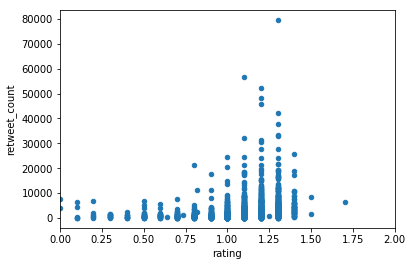

In [63]:
# scatter plot between rating and retweet count
twitter_archive_m.plot.scatter('rating', 'retweet_count');
# since most ratings exceeds 10/10 we set the x limit from 0 to 2
plt.xlim(0, 2)

As expected there seems to be a strong posistive correlation, which means the better the ratings for the dogs, the more retweets the tweet gets, except for a few zero ratings, which may have controversial cases and caused the tweets to get slightly more retweets than 0.2-0.5 ratings.

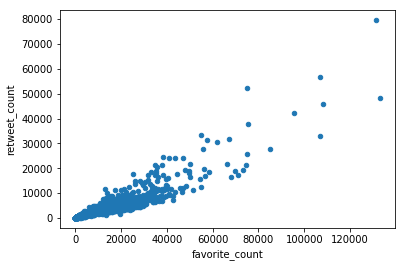

In [64]:
# scatter plot between favorite count and retweet count
twitter_archive_m.plot.scatter('favorite_count', 'retweet_count');

A strong positive correlation is shown, this is to be expected since they are both representing the popularity of a tweet.

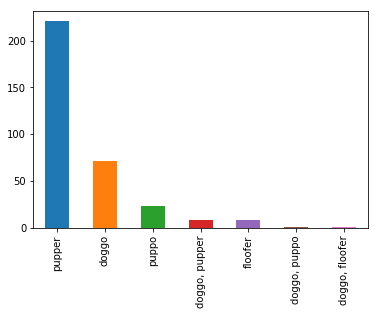

In [65]:
# a histogram showing count of each dog type
twitter_archive_m.stage.value_counts().plot(kind='bar');

Puppers seems mentioned the most on it's own, with doggos second behind, and doggos seem to be paired more with other stages in our dataset.

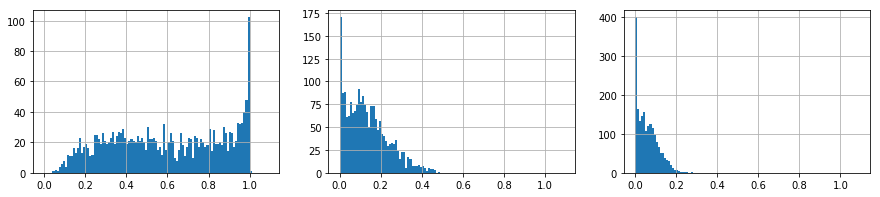

In [66]:
# plot multiple subplots across 3 columns and 1 row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

# plot a histogram of predictions confidence
twitter_archive_m.p1_conf.hist(ax=axes[0], bins=np.arange(0,1.1,0.01))
twitter_archive_m.p2_conf.hist(ax=axes[1], bins=np.arange(0,1.1,0.01))
twitter_archive_m.p3_conf.hist(ax=axes[2], bins=np.arange(0,1.1,0.01));


Going from the left, these are p1_conf, p2_conf, and p3_conf in order.

Between all 3 predictions of the algorithm, most of its probability is below 50% confidence, but as we can see, the algorithm's top prediction rarely go below 30%, and it has many instances with high confidence. If the dataset had a classifier variable that holds the actual answer of the question, we could've compared it with the predictions and found out how reliable the algorithm is.